In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/Users/heste/Downloads/cost-2023-12-01-2024-01-01.csv"
data = pd.read_csv(file_path)

# Check the first few rows of the dataframe to understand its structure and identify the timestamp column
data.head()

,timestamp,currency,GPT-4 Turbo,GPT-4,GPT-3.5 Turbo,Assistants API,Fine-tuning models,Embedding models,Base models,Image models,Audio models
0,1701388800,usd,0.000,0,0.0000,0,0,0,0,0,0
1,1701475200,usd,0.000,0,0.0000,0,0,0,0,0,0
2,1701561600,usd,0.000,0,0.0000,0,0,0,0,0,0
3,1701648000,usd,114.331,0,11.8495,0,0,0,0,0,0
4,1701734400,usd,0.000,0,0.0000,0,0,0,0,0,0


In [2]:
data["timestamp_jp"] = (
    pd.to_datetime(data["timestamp"], unit="s")
    .dt.tz_localize("UTC")
    .dt.tz_convert("Asia/Tokyo")
    .dt.strftime("%Y/%m/%d %H:%M:%S")
)

In [3]:
data.to_csv("/Users/heste/Downloads/cost-2023-12-01-2024-01-01-jp.csv", index=False, encoding="utf-8-sig")

In [ ]:
import pandas as pd
from sn_script.config import (
    Config,
)


In [5]:
subcategory_annotation_df = pd.read_csv(
    Config.target_base_dir / "付加的情報の下位分類の集計 - data.csv"
)

In [6]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

subcategory_annotation_df["gold_str"] = subcategory_annotation_df["gold"].astype(str)
subcategory_annotation_df["chatgpt4_str"] = subcategory_annotation_df[
    "chatgpt4"
].astype(str)

# Prepare the data for accuracy and F1 score calculation with the values as strings
y_true_str = subcategory_annotation_df["gold_str"]
y_pred_str = subcategory_annotation_df["chatgpt4_str"]

# Recalculate accuracy
accuracy_str = accuracy_score(y_true_str, y_pred_str)

# Recalculate macro F1 score
macro_f1_str = f1_score(y_true_str, y_pred_str, average="macro")

# Recalculate classification report for detailed analysis (precision, recall, f1-score by class)
class_report = classification_report(y_true_str, y_pred_str, output_dict=True)

accuracy_str, macro_f1_str, class_report["macro avg"]

/Users/heste/workspace/sn-script/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heste/workspace/sn-script/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heste/workspace/sn-script/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5581395348837209,
 0.4434559884559885,
 {'precision': 0.5005555555555555,
  'recall': 0.4305555555555555,
  'f1-score': 0.4434559884559885,
  'support': 43.0})

In [7]:
for k, v in class_report.items():
    if isinstance(v, dict):
        print(k, v["f1-score"])

1.1 0.8000000000000002
1.2 0.0
1.4 0.75
1.5 0.5555555555555556
1.8 0.28571428571428575
2.1 0.28571428571428575
2.3 0.7272727272727272
2.4 0.3636363636363636
2.5 0.0
3.3 0.6666666666666666
macro avg 0.4434559884559885
weighted avg 0.5785764622973926


In [8]:
# accuracy, precision, recall, f1-score for each class and macro average
for k, v in class_report.items():
    if isinstance(v, dict):
        print(
            k,
            v["precision"],
            v["recall"],
            v["f1-score"],
        )

1.1 0.8 0.8 0.8000000000000002
1.2 0.0 0.0 0.0
1.4 0.75 0.75 0.75
1.5 0.5555555555555556 0.5555555555555556 0.5555555555555556
1.8 0.5 0.2 0.28571428571428575
2.1 0.2 0.5 0.28571428571428575
2.3 0.8 0.6666666666666666 0.7272727272727272
2.4 0.4 0.3333333333333333 0.3636363636363636
2.5 0.0 0.0 0.0
3.3 1.0 0.5 0.6666666666666666
macro avg 0.5005555555555555 0.4305555555555555 0.4434559884559885
weighted avg 0.6302325581395349 0.5581395348837209 0.5785764622973926


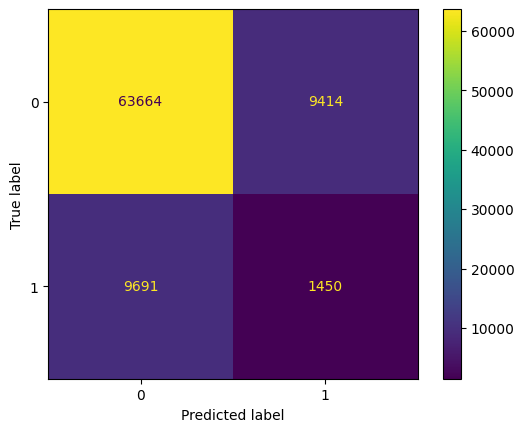

In [6]:
# アクション
import json

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

with open("/Users/heste/workspace/soccernet/sn-script/database/test/result.json") as f:
    json_data = json.load(f)

matrix = confusion_matrix(
    json_data["target_label"], json_data["predict_label"]
)
cmp = ConfusionMatrixDisplay(
    matrix,
)
cmp.plot()

In [1]:
%cd ..

/Users/heste/workspace/soccernet/sn-script


In [ ]:
import re

import pandas as pd
from SoccerNet.Downloader import getListGames

games = getListGames(task="caption")

video_team_map_csv = "database/misc/video_team_map.csv"


def extract_data_from_game(game: str):
    league, season, match_data = game.split('/')
    # regexで抽出する
    date = re.search(r'\d{4}-\d{2}-\d{2}', match_data).group()
    kickoff_time = re.search(r'\d{2}-\d{2}', match_data).group()

    # score は 空白 数字 - 数字 空白
    home_score = int(re.search(r' (\d) - \d ', match_data).group(1))
    away_score = int(re.search(r' \d - (\d) ', match_data).group(1))

    # home-team は、 kickoff_time の後から score の前まで
    home_team = re.search(r' \d{2}-\d{2} (.*) \d - \d ', match_data).group(1)
    # away-teamは、scoreの後から終わりまで
    away_team = re.search(r' \d - \d (.*)', match_data).group(1)

    return {
        "game": game,
        "home_team": home_team,
        "away_team": away_team,
    }

data_list = []
for game in games:
    data_list.append(extract_data_from_game(game))

df = pd.DataFrame(data_list)
df["1st_half_left_team"] = None
df.to_csv(video_team_map_csv, index=False, encoding="utf-8-sig")

# 作成後アノテーションする

In [4]:
# アノテーション済みのデータを読み込む
video_team_map_csv = "database/misc/video_team_map.csv"
video_team_map_df = pd.read_csv(video_team_map_csv)

result_list = []
for _, row in video_team_map_df.iterrows():
    if row["1st_half_left_team"] == row["home_team"]:
        result_1st = {
            "game": row["game"],
            "half": 1,
            "left": row["home_team"],
            "right": row["away_team"],
        }
        result_2nd = {
            "game": row["game"],
            "half": 2,
            "left": row["away_team"],
            "right": row["home_team"],
        }
    elif row["1st_half_left_team"] == row["away_team"]:
        result_1st = {
            "game": row["game"],
            "half": 1,
            "left": row["away_team"],
            "right": row["home_team"],
        }
        result_2nd = {
            "game": row["game"],
            "half": 2,
            "left": row["home_team"],
            "right": row["away_team"],
        }
    else:
        continue
    result_list.append(result_1st)
    result_list.append(result_2nd)

result_df = pd.DataFrame(result_list)
result_df.to_csv("database/misc/side_to_team.csv", index=False, encoding="utf-8-sig")


In [ ]:
# gsrのアノテーションのチーム情報が正しいか確認する
import json
import os

import cv2
from PIL import ImageColor
from SoccerNet.Evaluation.utils import FRAME_CLASS_COLOR_DICTIONARY, FRAME_CLASS_DICTIONARY, INVERSE_FRAME_CLASS_DICTIONARY


def get_color(color):
    box_color = ImageColor.getcolor(color, "RGB")
    return (box_color[2],box_color[1],box_color[0])


def draw_bboxes(image, bboxes, thickness=8):
    image_bbox = image
    for bbox in bboxes:
        image_bbox = cv2.rectangle(
            image_bbox,
            (bbox["x"], bbox["y"]),
            (bbox["x"] + bbox["w"], bbox["y"] + bbox["h"]),
            get_color(FRAME_CLASS_COLOR_DICTIONARY[INVERSE_FRAME_CLASS_DICTIONARY[bbox["class"]]]), thickness
        )
    return image_bbox

def write_bbox(img_path, bboxes, save_path):
    image = cv2.imread(img_path)
    assert image is not None, f"Failed to read image from {img_path}"
    image = draw_bboxes(image, bboxes)
    assert image is not None, "Failed to draw bboxes on image"
    if os.path.dirname(save_path):
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
    assert cv2.imwrite(save_path, image), "Failed to save image with bboxes"


first_half_path = "/Users/heste/workspace/soccernet/SoccerNetGS_in_lrlab/v3-720p/train/SNGS-000_1/img1/0.png"
first_half_left_bbox_image = {
    "x": 696,
    "y": 287,
    "x_center": 717,
    "y_center": 322,
    "w": 41,
    "h": 68,
    "class": 1
}
write_bbox(first_half_path, [first_half_left_bbox_image], "database/misc/first_half_left_bbox.png")



        {
            "id": "000-0-0001",
            "image_id": "000-0",
            "track_id": 1,
            "supercategory": "object",
            "category_id": 1,
            "attributes": {
                "role": "player",
                "jersey": null,
                "team": "left"
            },
            "bbox_image": {
                "x": 696.1466666666668,
                "y": 287.9266666666667,
                "x_center": 717.0933333333332,
                "y_center": 322.3666666666667,
                "w": 41.89333333333309,
                "h": 68.88
            },
            "bbox_pitch": null,
            "bbox_pitch_raw": null
        },


In [15]:
second_half_path = "/Users/heste/workspace/soccernet/SoccerNetGS_in_lrlab/v3-720p/train/SNGS-000_1/img1/22_0.png"
second_half_left_bbox_image = {
    "x": 600,
    "y": 184,
    "x_center": 613,
    "y_center": 207,
    "w": 26,
    "h": 46,
    "class": 1
}
write_bbox(second_half_path, [second_half_left_bbox_image], "database/misc/second_half_left_bbox.png")


        {
            "id": "000-22_0-0001",
            "image_id": "000-22_0",
            "track_id": null,
            "supercategory": "object",
            "category_id": 1,
            "attributes": {
                "role": "player",
                "jersey": "22",
                "team": "right"
            },
            "bbox_image": {
                "x": 600.22,
                "y": 183.98000000000002,
                "x_center": 612.9733333333334,
                "y_center": 206.92333333333335,
                "w": 25.50666666666666,
                "h": 45.886666666666656
            },
            "bbox_pitch": null,
            "bbox_pitch_raw": null
        },


game state jsonの分析

In [5]:
%cd ~/workspace/soccernet/sn-script/

/Users/heste/workspace/soccernet/sn-script


In [ ]:
import pandas as pd
import json

gsr_path = "docs/v3-720p/SNGS-000/Labels-GameState.json"
gsr_data = json.load(open(gsr_path))
instance_df = pd.DataFrame(gsr_data["annotations"])
image_df = pd.DataFrame(gsr_data["images"])

In [13]:
instance_df.groupby("track_id").size().describe()

count    66.000000
mean     10.242424
std      10.758983
min       1.000000
25%       2.000000
50%       8.000000
75%      15.000000
max      59.000000
dtype: float64

In [1]:
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel


def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]


# Each input text should start with "query: " or "passage: ", even for non-English texts.
# For tasks other than retrieval, you can simply use the "query: " prefix.
input_texts = ['query: how much protein should a female eat',
               'query: 南瓜的家常做法',
               "passage: As a general guideline, the CDC's average requirement of protein for women ages 19 to 70 is 46 grams per day. But, as you can see from this chart, you'll need to increase that if you're expecting or training for a marathon. Check out the chart below to see how much protein you should be eating each day.",
               "passage: 1.清炒南瓜丝 原料:嫩南瓜半个 调料:葱、盐、白糖、鸡精 做法: 1、南瓜用刀薄薄的削去表面一层皮,用勺子刮去瓤 2、擦成细丝(没有擦菜板就用刀慢慢切成细丝) 3、锅烧热放油,入葱花煸出香味 4、入南瓜丝快速翻炒一分钟左右,放盐、一点白糖和鸡精调味出锅 2.香葱炒南瓜 原料:南瓜1只 调料:香葱、蒜末、橄榄油、盐 做法: 1、将南瓜去皮,切成片 2、油锅8成热后,将蒜末放入爆香 3、爆香后,将南瓜片放入,翻炒 4、在翻炒的同时,可以不时地往锅里加水,但不要太多 5、放入盐,炒匀 6、南瓜差不多软和绵了之后,就可以关火 7、撒入香葱,即可出锅"]

tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-base')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-base')

# Tokenize the input texts
batch_dict = tokenizer(input_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')

outputs = model(**batch_dict)
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:2] @ embeddings[2:].T) * 100
print(scores.tolist())


/Users/heste/workspace/soccernet/sn-script/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████| 418/418 [00:00<00:00, 798kB/s]
sentencepiece.bpe.model: 100%|██████████| 5.07M/5.07M [00:00<00:00, 12.9MB/s]
tokenizer.json: 100%|██████████| 17.1M/17.1M [00:01<00:00, 13.5MB/s]
config.json: 100%|██████████| 694/694 [00:00<00:00, 4.44MB/s]
model.safetensors: 100%|██████████| 1.11G/1.11G [01:25<00:00, 13.0MB/s]


[[90.79105377197266, 71.17608642578125], [72.53495788574219, 90.14604949951172]]


In [ ]:
# 選手同定モジュールから得た選手リストを結合
import pandas as pd

csv_1 = ""
csv_2 = ""

df_1 = pd.read_csv(csv_1)
df_2 = pd.read_csv(csv_2)
df_concat = pd.concat([df_1, df_2], ignore_index=True)

In [1]:
%ls

additional-information/        v3/
additional-information-exp002/ v3-720p/
gamestate-2024/                v3-team/
outputs/


In [ ]:
from SoccerNet.Downloader import getListGames

result_dict = {}
for split in ["train", "test", "valid"]:
    games = getListGames(split, task="frames")
    result_dict[split] = games

inv_result_dict = {v: k for k, v in result_dict.items() for v in result_dict[k]}


In [7]:
inv_result_dict["europe_uefa-champions-league/2015-2016/2015-11-03 - 22-45 Shakhtar Donetsk 4 - 0 Malmo FF"]

'test'

In [9]:
import pandas as pd

df = pd.read_csv("/Users/heste/workspace/soccernet/sn-script/database/misc/RAGモジュール出力サンプル-13090437a14481f485ffdf605d3408cd.csv")


In [10]:
df["split_v3"] = df["game"].map(inv_result_dict)

In [12]:
df[["game", "split_v3"]].to_dict(orient="records")

[{'game': 'germany_bundesliga/2015-2016/2015-08-29 - 19-30 Bayern Munich 3 - 0 Bayer Leverkusen',
  'split_v3': 'test'},
 {'game': 'italy_serie-a/2014-2015/2015-04-29 - 21-45 Juventus 3 - 2 Fiorentina',
  'split_v3': 'test'},
 {'game': 'europe_uefa-champions-league/2015-2016/2015-11-03 - 22-45 Shakhtar Donetsk 4 - 0 Malmo FF',
  'split_v3': 'test'},
 {'game': 'england_epl/2016-2017/2016-09-24 - 14-30 Manchester United 4 - 1 Leicester',
  'split_v3': 'test'},
 {'game': 'england_epl/2015-2016/2015-08-23 - 15-30 West Brom 2 - 3 Chelsea',
  'split_v3': 'test'},
 {'game': 'england_epl/2015-2016/2015-08-23 - 15-30 West Brom 2 - 3 Chelsea',
  'split_v3': 'test'},
 {'game': 'germany_bundesliga/2016-2017/2016-11-05 - 17-30 Hamburger SV 2 - 5 Dortmund',
  'split_v3': 'test'},
 {'game': 'germany_bundesliga/2015-2016/2015-08-29 - 19-30 Bayern Munich 3 - 0 Bayer Leverkusen',
  'split_v3': 'test'},
 {'game': 'germany_bundesliga/2015-2016/2015-08-29 - 19-30 Bayern Munich 3 - 0 Bayer Leverkusen',
  's

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load the Excel file
file_path = '../database/misc/付加的情報_評価結果集計.xlsx'  # ファイルパスを指定
excel_data = pd.ExcelFile(file_path)

# Load the relevant sheets for analysis
moriy_data = excel_data.parse('moriy')
takamura_data = excel_data.parse('takamura')
tanaka_data = excel_data.parse('tanaka')

# Extract the relevant columns (評価) from each sheet
columns_of_interest = ['関連性', '有益さ', '興味']

# Extract ratings from each sheet
moriy_ratings = moriy_data[columns_of_interest].dropna()
takamura_ratings = takamura_data[columns_of_interest].dropna()
tanaka_ratings = tanaka_data[columns_of_interest].dropna()

# Ensure the number of rows is consistent across the sheets
min_rows = min(len(moriy_ratings), len(takamura_ratings), len(tanaka_ratings))
moriy_ratings = moriy_ratings.iloc[:min_rows]
takamura_ratings = takamura_ratings.iloc[:min_rows]
tanaka_ratings = tanaka_ratings.iloc[:min_rows]

# Initialize a dictionary to store kappas for each metric
kappa_results = {col: [] for col in columns_of_interest}

# Calculate Weighted Kappa for all pairs of evaluators and metrics
for col in columns_of_interest:
    ratings_moriy = moriy_ratings[col].astype(int).values
    ratings_takamura = takamura_ratings[col].astype(int).values
    ratings_tanaka = tanaka_ratings[col].astype(int).values

    # Calculate Weighted Kappa for each pair
    kappa_mt = cohen_kappa_score(ratings_moriy, ratings_takamura, weights='quadratic')
    kappa_mn = cohen_kappa_score(ratings_moriy, ratings_tanaka, weights='quadratic')
    kappa_tn = cohen_kappa_score(ratings_takamura, ratings_tanaka, weights='quadratic')

    # Store results
    kappa_results[col] = [kappa_mt, kappa_mn, kappa_tn]

# Calculate the average kappa for each metric
average_kappas = {col: np.mean(kappas) for col, kappas in kappa_results.items()}

# Organize detailed kappa results for each metric
detailed_kappa_results = {
    col: {
        "Moriy vs Takamura": kappa_results[col][0],
        "Moriy vs Tanaka": kappa_results[col][1],
        "Takamura vs Tanaka": kappa_results[col][2],
        "Average": average_kappas[col]
    }
    for col in columns_of_interest
}

# Convert to a DataFrame for better display
detailed_kappa_df = pd.DataFrame(detailed_kappa_results).T
detailed_kappa_df.columns = ["A vs B", "A vs C", "B vs C", "Average"]

# Display the detailed kappa results
print(detailed_kappa_df)


       A vs B    A vs C    B vs C   Average
関連性  0.374359  0.516981  0.489489  0.460277
有益さ  0.421740  0.309612  0.329677  0.353677
興味   0.494118  0.533333  0.507425  0.511625


In [3]:
columns_of_interest = ['approach', '関連性', '有益さ', '興味']

# Extract and combine data from all evaluators
combined_data = pd.concat([
    moriy_data[columns_of_interest].dropna(),
    takamura_data[columns_of_interest].dropna(),
    tanaka_data[columns_of_interest].dropna()
])

# Group by 'approach' and calculate the mean for each metric
approach_means = combined_data.groupby('approach')[['関連性', '有益さ', '興味']].mean()

# Display the result
print(approach_means)


               関連性       有益さ        興味
approach                              
a_star    1.900000  2.116667  2.000000
b         1.783333  1.966667  1.883333
b_star    1.950000  2.066667  1.983333
c_star    2.466667  2.483333  2.533333


In [9]:
columns_of_interest = ["sample_id", 'approach', '関連性', '有益さ', '興味']

# Extract and combine data from all evaluators
combined_data = pd.concat([
    moriy_data[columns_of_interest].dropna(),
    takamura_data[columns_of_interest].dropna(),
    tanaka_data[columns_of_interest].dropna()
])

# サンプルごとのアプローチのばらつき
approach_means = combined_data.groupby(['sample_id'])[['関連性', '有益さ', '興味']].describe()

# sample_id ごとの 関連性 の mean のプロット(スカッタープロット)
approach_means[["関連性", "有益さ"]]["mean"].plot(kind="scatter")

KeyError: 'mean'